In [2]:
import pandas as pd

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/bfritscher/pandas_demo/master/statistiques/Exercice_4a.csv", index_col=False)
df.head(5)

,obs
0,2.4
1,6.3
2,7.2
3,9.7
4,0.8


In [43]:
bins = [0,2,4,6,8,10,12,14]
discret = pd.cut(df["obs"], bins)
discret.value_counts().sort_index()

(0, 2]      12
(2, 4]      26
(4, 6]      11
(6, 8]      10
(8, 10]     17
(10, 12]     9
(12, 14]     5
Name: obs, dtype: int64

In [50]:
bins = [0,2,4,6,8,10,12,14]
s = df.groupby(pd.cut(df["obs"], bins, right=False)).size()
s

obs
[0, 2)      12
[2, 4)      26
[4, 6)      11
[6, 8)      10
[8, 10)     16
[10, 12)     9
[12, 14)     6
dtype: int64

Text(0,0.5,'Nb de collaborateurs')

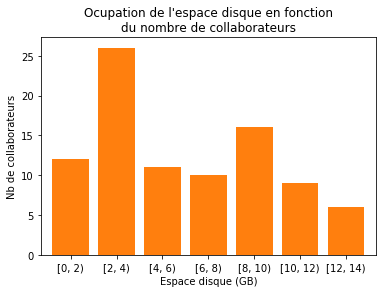

In [52]:
g = s.plot(kind="bar", title="Ocupation de l'espace disque en fonction\ndu nombre de collaborateurs", rot=0, color=['tab:orange',]*12, width=0.8)
g.set_xlabel("Espace disque (GB)")
g.set_ylabel("Nb de collaborateurs")

In [114]:
table = s.to_frame("Effectifs")

In [115]:
table["Fréquences"] = table.apply(lambda n: n / table["Effectifs"].sum() )

In [116]:
table["Effectifs cumulés croissants"] = s.cumsum()

In [117]:
table["Fréquences cumulées croissantes"] = table["Effectifs cumulés croissants"].apply(lambda n: n / table["Effectifs"].sum() )

In [118]:
table["Effectifs cumulés décroissants"] = table["Effectifs"].loc[::-1].cumsum()

In [119]:
table["Fréquences cumulées décroissantes"] = table["Effectifs cumulés décroissants"].apply(lambda n: n / table["Effectifs"].sum() )

In [120]:
table

,Effectifs,Fréquences,Effectifs cumulés croissants,Fréquences cumulées croissantes,Effectifs cumulés décroissants,Fréquences cumulées décroissantes
obs,,,,,,
"[0, 2)",12,0.133333,12,0.133333,90,1.000000
"[2, 4)",26,0.288889,38,0.422222,78,0.866667
"[4, 6)",11,0.122222,49,0.544444,52,0.577778
"[6, 8)",10,0.111111,59,0.655556,41,0.455556
"[8, 10)",16,0.177778,75,0.833333,31,0.344444
"[10, 12)",9,0.100000,84,0.933333,15,0.166667
"[12, 14)",6,0.066667,90,1.000000,6,0.066667
